Build MLP volgens [Bengio](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# download the names.txt file from github
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

In [ ]:
words = open('names.txt', 'r').read().splitlines()
print(words[:9])
print("-----")
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper']
-----
32033


In [ ]:
# build the vocabulary of characters and mappings to/from integers
## Zie les 1
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
## Create/build a dataset
## Block Size is how many characters, instead of only 2

block_size = 2
X, Y = [], []

for w in words[:5]:
  print(w)
  context= [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)




emma
.. ---> e
.e ---> m
em ---> m
mm ---> a
ma ---> .
olivia
.. ---> o
.o ---> l
ol ---> i
li ---> v
iv ---> i
vi ---> a
ia ---> .
ava
.. ---> a
.a ---> v
av ---> a
va ---> .
isabella
.. ---> i
.i ---> s
is ---> a
sa ---> b
ab ---> e
be ---> l
el ---> l
ll ---> a
la ---> .
sophia
.. ---> s
.s ---> o
so ---> p
op ---> h
ph ---> i
hi ---> a
ia ---> .


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 2]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
#2D embeddings random || Can use one_hot but for now just index
C = torch.randn((27, 2))
# C[5]
# F.one_hot(torch.tensor(5), num_classes=27).float() @ C

## Can use the tensor X as an argument in Table C
# print(C[X].shape)
# print("----")
# print(X[13,2])
# print("----")
# print(C[X][13,2])
# print("----")
# print(C[1])

In [ ]:
## So to embed X, you can just do C[X]
emb = C[X]
emb.shape

torch.Size([32, 2, 2])

In [ ]:
## Check with Weights, Biases and Number of Neurel

W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [ ]:
## https://pytorch.org/docs/stable/torch.html?highlight=torch#module-torch
## https://pytorch.org/docs/stable/generated/torch.cat.html#torch.cat           || CAT 	Concatenates the given sequence of seq tensors in the given dimension.
## https://pytorch.org/docs/stable/generated/torch.unbind.html#torch.unbind     || UNBIND Removes a tensor dimension.

# # Change Size([32, 3, 2]) to Size([32, 6, 2]) || Hardcode version
  # print(emb[:, 0, :].shape)
  # # Answer is torch.Size([32, 2])
  # print("----")
  # torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)
  # print(torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape)
  # # Answer is torch.Size([32, 6])

# # Dimension 1 is het aantal block die je nodig hebt
# torch.cat(torch.unbind(emb,1), 1).shape
  # # Answer is torch.Size([32, 6])

In [ ]:
## https://pytorch.org/docs/stable/generated/torch.Tensor.view.html             || Returns a new tensor with the same data as the self tensor but of a different shape.
## View is an easier way to manipulate the shape
# emb.view(32,6)
# emb.view(32,6) == torch.cat(torch.unbind(emb,1), 1)                           || Alles staat op True wat het is hetzelfde

In [ ]:
## Instead of 32, you can do emb.shape[0] or -1. With -1 Pytorch checkt zelf wat het moet zijn
## hidden layer of activations for the

h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)

## For Broadcasting measures (See last colab)

# (emb.view(-1 , 6) @ W1 + b1).shape    = torch.Size([32, 100]
# b1.shap                               = torch.Size([32, 100]

# 32, 100
#  1, 100

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
# prob.shape

In [ ]:
## Data without training
# print(torch.arange(32))
# print("----")
# prob[torch.arange(32), Y]

loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(13.3541)

In [ ]:
## See below

# emb = C[X]
# h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)
# logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(32), Y].log().mean()
# loss

In [ ]:
## https://pytorch.org/docs/stable/generated/torch.nn.functional.binary_cross_entropy.html || Function that measures the Binary Cross Entropy between the target and input probabilities.

## Can calculate loss also with cross entropy. So the code below will be
  # counts = logits.exp()
  # prob = counts / counts.sum(1, keepdims=True)
  # loss = -prob[torch.arange(32), Y].log().mean()

# F.cross_entropy(logits, Y)

# The forward pass will below

# emb = C[X]
# h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, Y)
# loss


Combining the information above and putting them
in a easy, clear codeblock

In [ ]:
## Create/build a dataset
## Block Size is how many characters

block_size = 3
X, Y = [], []

for w in words:
  # print(w)
  context= [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
# This is dataset
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
# number of parameters in total
sum(p.nelement() for p in parameters)

3481

In [ ]:
## Change fixed number for steps to learning rate

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
## by adding a learning rate, you can keep track of the rates at losses by lri && lossi

lri = []
lossi = []

In [ ]:
## train model
## Use random int (ix) to training smaller batches

for i in range(10000):

  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  # print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  # lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  # lri.append(lre[i])
  # lossi.append(loss.item())

print(loss.item())

2.025636911392212


In [ ]:
## plot the stats for learning rate (X-as) and loss (Y-as)
# plt.plot(lri, lossi)

In [ ]:
## Check full data set

emb = C[X]
h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3227, grad_fn=<NllLossBackward0>)

Common in training is to split up your data in three

- Training Split            80% || Paramaters
- Dev/Validation Split      10% || Hyper parameters
- Test Split                10% || Eval parameters at the end


In [ ]:
# build the vocabulary of characters and mappings to/from integers
## Zie les 1
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
##        Build the dataset
##        Made dataset a functie
##        Xtr,Ytr = Training Split  || Xdev, Ydev = Dev Split || Xte, Yte = Test Split

block_size = 3

def build_dataset(words):
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
# This is Training dataset
Xtr.shape, Ytr.shape

(torch.Size([182551, 3]), torch.Size([182551]))

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
# number of parameters in total
sum(p.nelement() for p in parameters)

11897

In [ ]:
## Change fixed number for steps to learning rate
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
## by adding a learning rate, you can keep track of the rates at losses by lri && lossi
lri = []
lossi = []
stepi = []

In [ ]:
## train model with Xtr en Ytr
## Use random int (ix) to training smaller batches

for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1 , 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

In [ ]:
## Check of after training set
print(loss.item())

1.9860793352127075


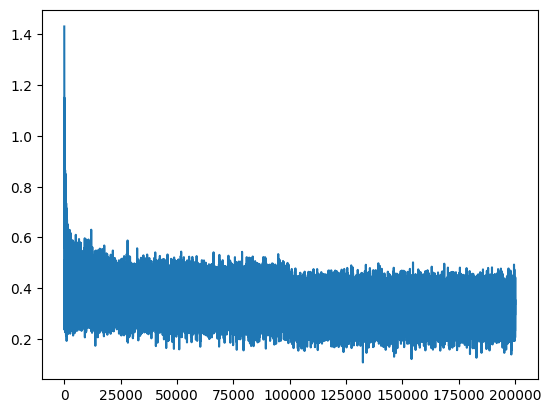

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
## Eval with the Dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1 , 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1677, grad_fn=<NllLossBackward0>)

In [ ]:
## Eval with the Training set
emb = C[Xtr]
h = torch.tanh(emb.view(-1 , 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1271, grad_fn=<NllLossBackward0>)

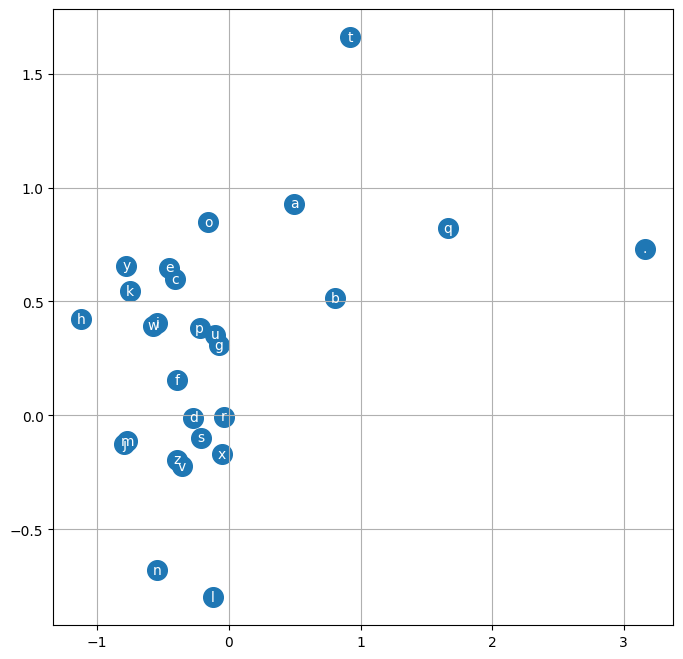

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(21475565483 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))